# 机器学习：实践作业五
**王海生 10235101559**

In [1]:
%pip install scikit-learn numpy matplotlib

Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, f1_score, auc

====== 数据基本信息 ======
样本数： 150
特征数： 4
特征名称： ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
标签分布： {np.int64(0): np.int64(50), np.int64(1): np.int64(50), np.int64(2): np.int64(50)}


===== 使用 entropy 作为分裂标准 =====
Accuracy(entropy): 0.8889
F1-score(entropy): 0.8888


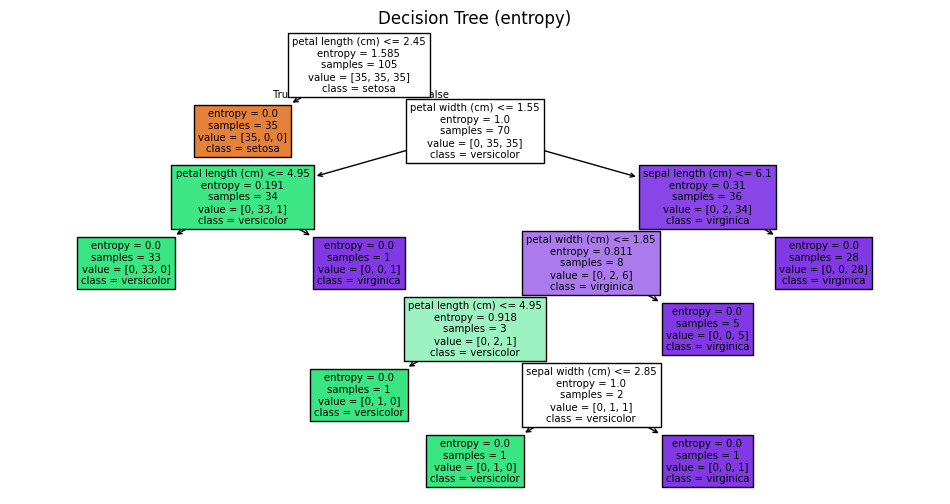

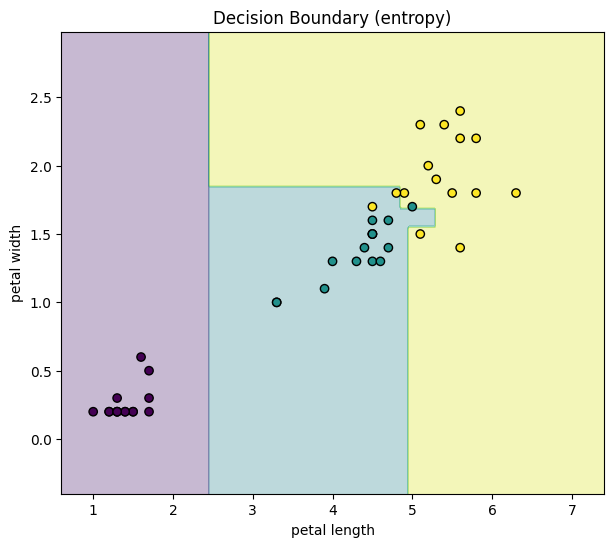

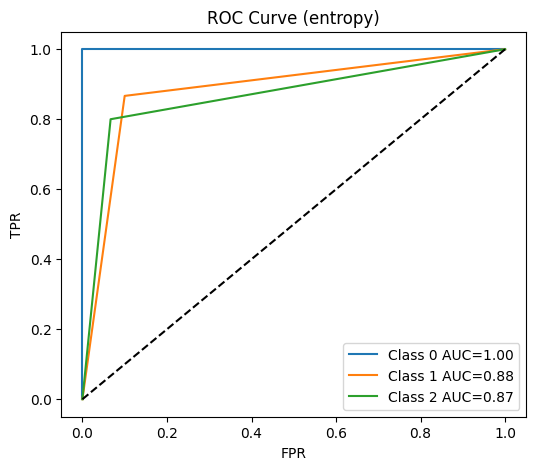

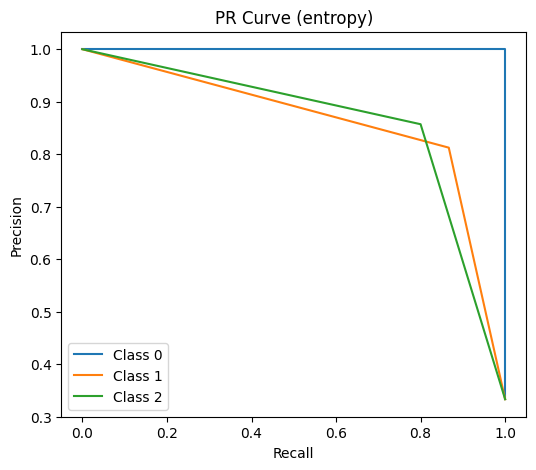


===== 使用 gini 作为分裂标准 =====
Accuracy(gini): 0.9333
F1-score(gini): 0.9327


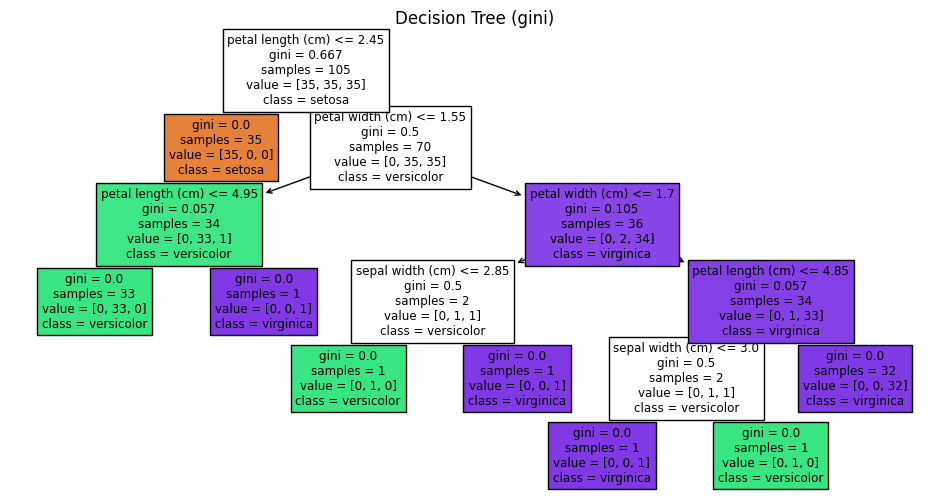

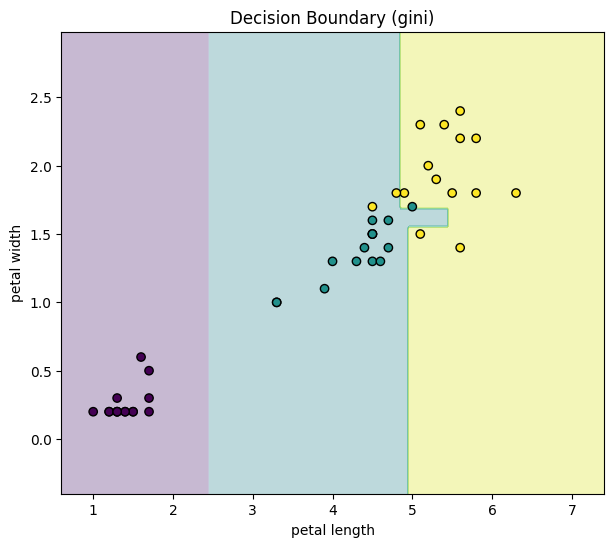

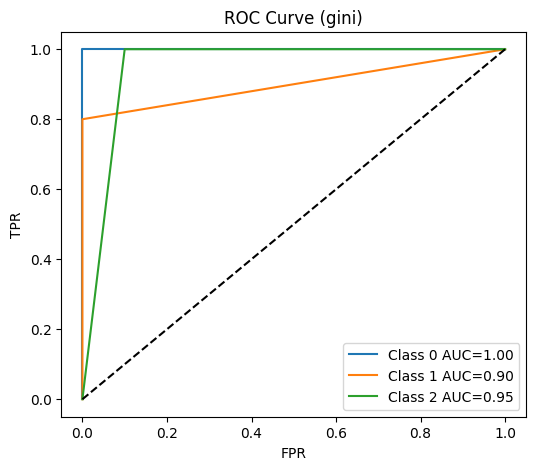

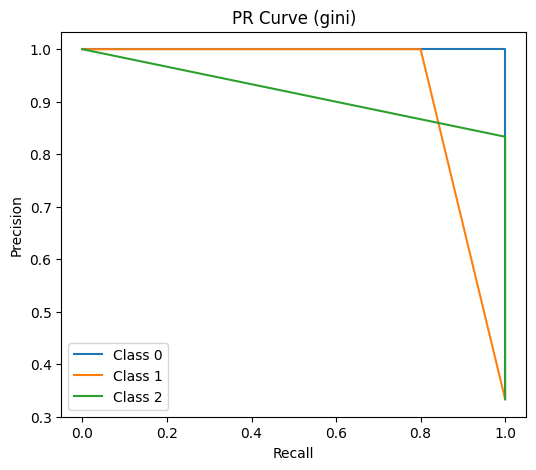

In [3]:
# 基于鸢尾花数据集,运用ID3和CART算法构建决策树进行分类

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.preprocessing import label_binarize

# 加载数据 & 打印基本信息
iris = load_iris()
X = iris.data   # 4个特征
y = iris.target # 标签（0,1,2 三类）

print("====== 数据基本信息 ======")
print("样本数：", X.shape[0])
print("特征数：", X.shape[1])
print("特征名称：", iris.feature_names)
unique, counts = np.unique(y, return_counts=True)
print("标签分布：", dict(zip(unique, counts)))
print("==========================\n")

# 划分训练集/测试集，测试集占30%，使用分层采样保证类别比例
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 为画 ROC，需要将标签二值化（多分类 One-vs-Rest）
y_test_bin = label_binarize(y_test, classes=[0,1,2])

# ID3 (entropy) & CART (gini)
# entropy对应ID3算法的信息增益准则，gini对应CART算法的基尼指数准则
criteria = ["entropy", "gini"]

for criterion in criteria:
    print(f"\n===== 使用 {criterion} 作为分裂标准 =====")

    # 创建决策树分类器，指定分裂准则
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)  # 训练模型

    # 预测测试集
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Accuracy({criterion}): {acc:.4f}")
    print(f"F1-score({criterion}): {f1_score(y_test, y_pred, average='macro'):.4f}")

    # 绘制决策树结构
    plt.figure(figsize=(12, 6))
    plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
    plt.title(f"Decision Tree ({criterion})")
    plt.show()

    # 绘制决策边界（使用花瓣长度和宽度两个特征）
    # 使用前两个花瓣特征重新训练模型用于可视化
    X_train_2d = X_train[:, 2:4]  # 只使用花瓣长度和宽度
    X_test_2d = X_test[:, 2:4]
    
    clf_2d = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf_2d.fit(X_train_2d, y_train)
    
    # 创建网格点用于绘制决策边界
    x_min, x_max = X_train_2d[:, 0].min() - 0.5, X_train_2d[:, 0].max() + 0.5
    y_min, y_max = X_train_2d[:, 1].min() - 0.5, X_train_2d[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    # 对网格点进行预测
    Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)  # 绘制决策边界
    plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k')  # 绘制测试样本点
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.title(f"Decision Boundary ({criterion})")
    plt.show()

    # 绘制 ROC 曲线（多分类）
    # 获取每个类别的预测概率
    y_score = clf.predict_proba(X_test)
    plt.figure(figsize=(6,5))
    # 对每个类别分别绘制ROC曲线
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)  # 计算AUC值
        plt.plot(fpr, tpr, label=f"Class {i} AUC={roc_auc:.2f}")

    plt.plot([0,1], [0,1], 'k--')  # 绘制对角线作为参考
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"ROC Curve ({criterion})")
    plt.legend()
    plt.show()

    # 绘制 PR 曲线（多分类）
    plt.figure(figsize=(6,5))
    for i in range(3):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, label=f"Class {i}")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"PR Curve ({criterion})")
    plt.legend()
    plt.show()


===== 使用 max_depth=2 =====
Accuracy(max_depth=2): 0.8889
F1-score: 0.8888


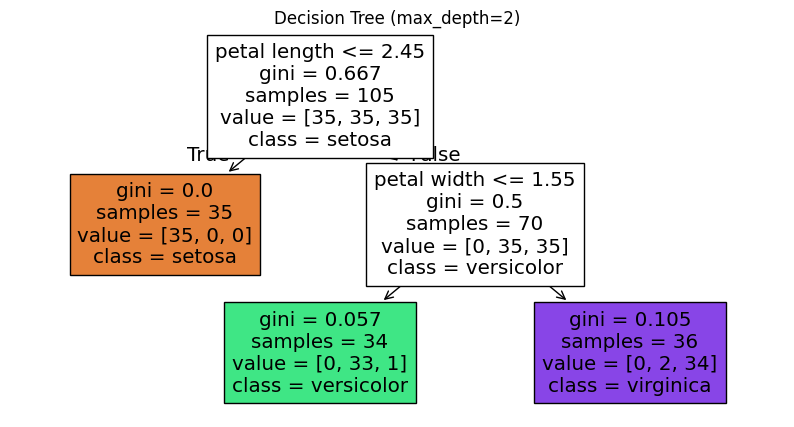

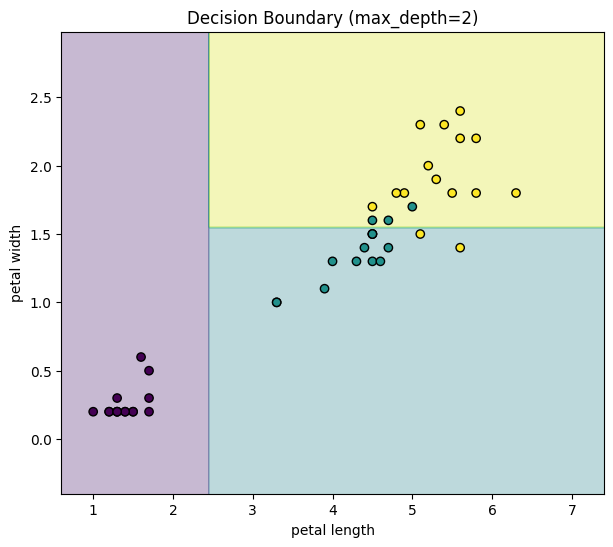

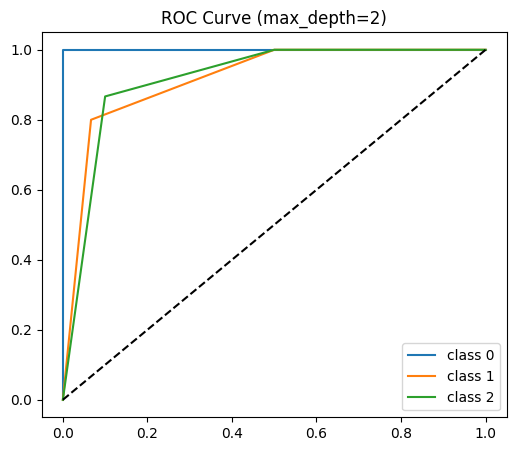

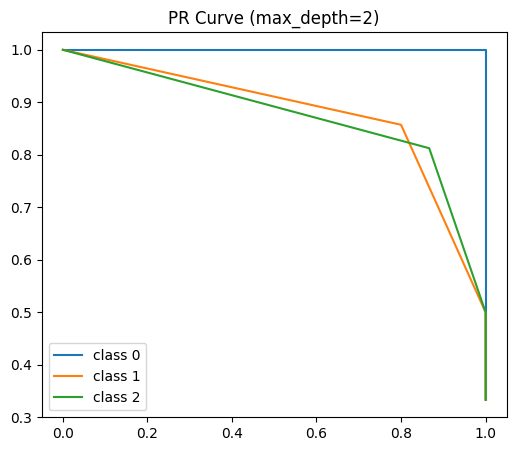


===== 使用 max_depth=4 =====
Accuracy(max_depth=4): 0.9333
F1-score: 0.9333


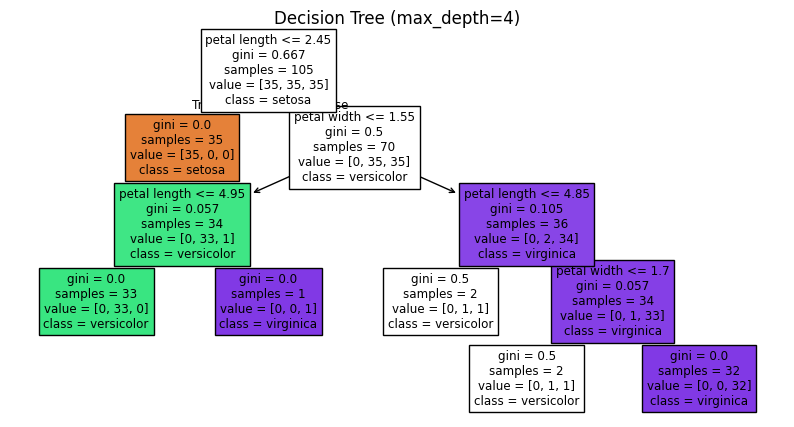

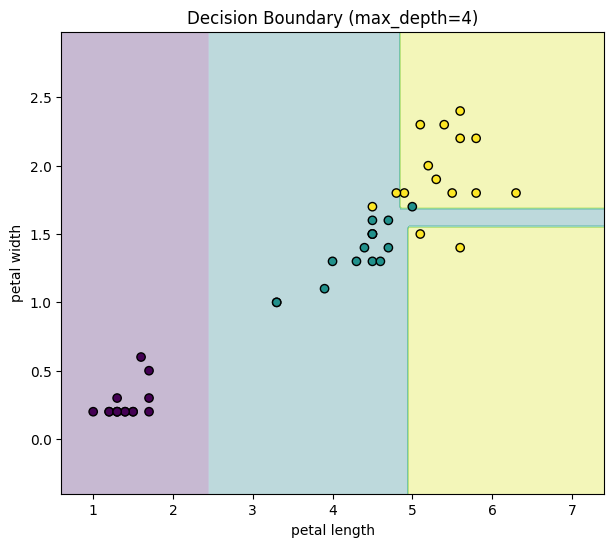

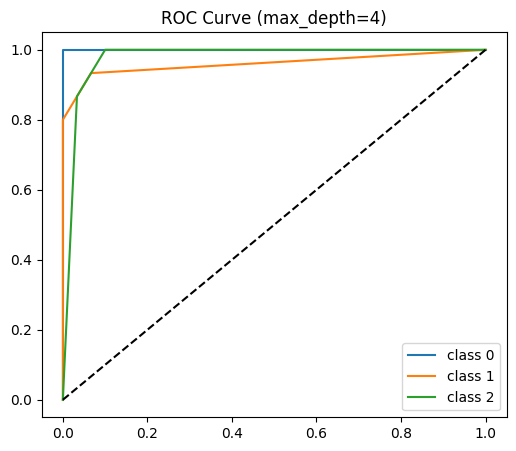

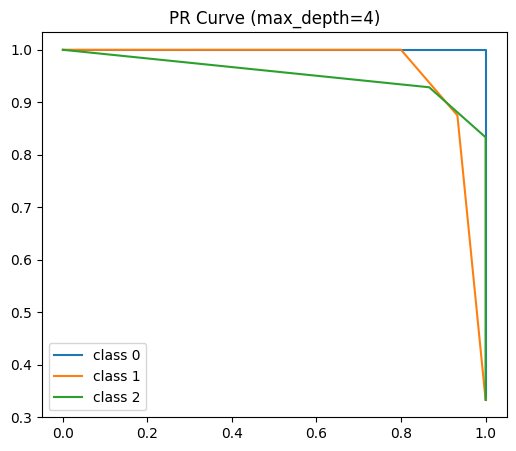


===== 使用 max_depth=5 =====
Accuracy(max_depth=5): 0.9333
F1-score: 0.9333


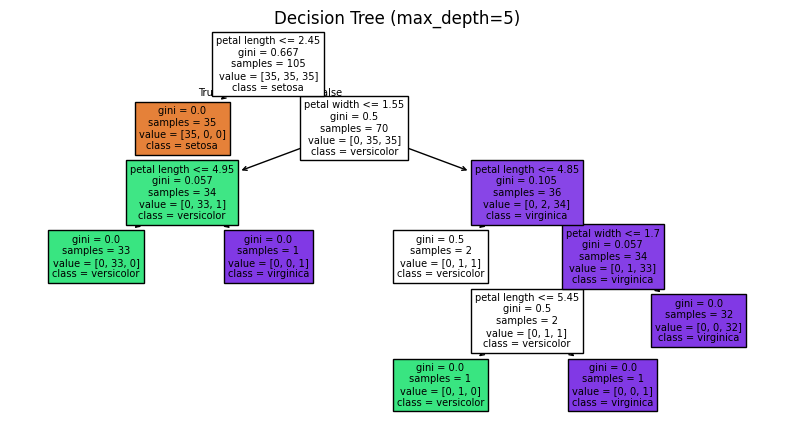

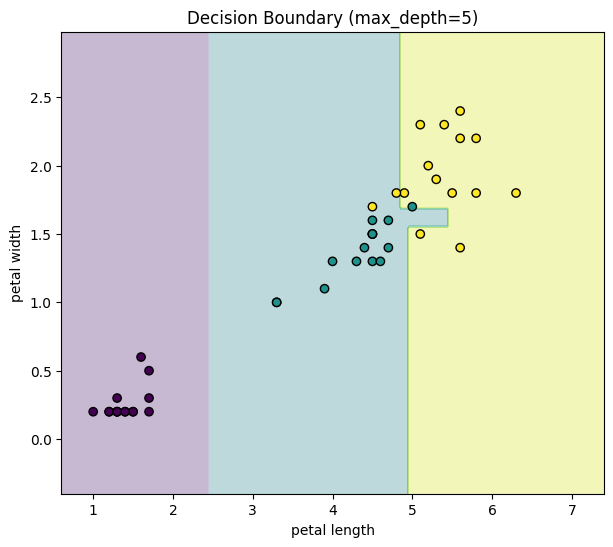

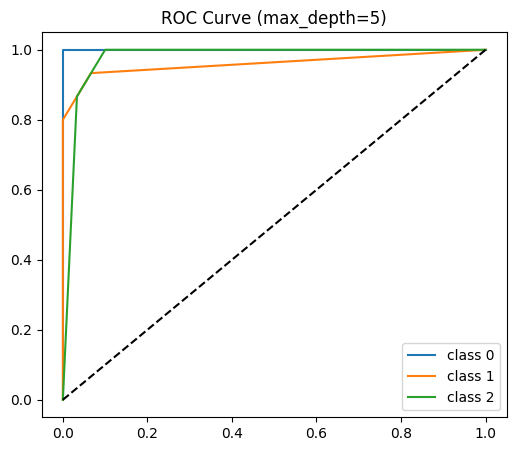

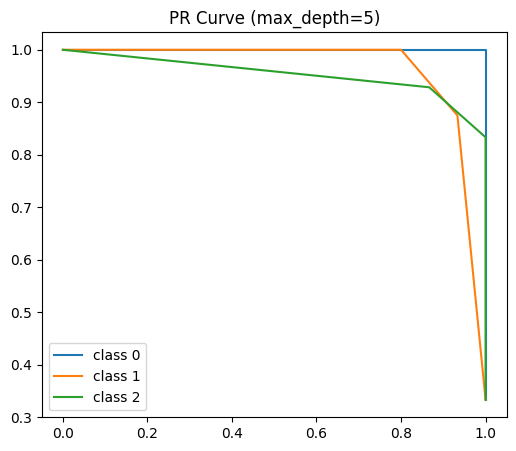

In [4]:
# 基于鸢尾花数据集，使用决策树的预剪枝技巧

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.preprocessing import label_binarize

# 加载数据
iris = load_iris()
X = iris.data[:, 2:4]  # 只使用花瓣长度和宽度，便于可视化
y = iris.target

# 划分训练集/测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 标签二值化，用于多分类ROC曲线
y_test_bin = label_binarize(y_test, classes=[0,1,2])

# 预剪枝：通过限制max_depth来控制树的复杂度
depth_list = [2, 4, 5]

for depth in depth_list:
    print(f"\n===== 使用 max_depth={depth} =====")

    # 创建决策树，限制最大深度进行预剪枝
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # 评估模型性能
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Accuracy(max_depth={depth}): {acc:.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")

    # 绘制决策树
    plt.figure(figsize=(10,5))
    plot_tree(clf, filled=True, feature_names=["petal length", "petal width"], class_names=iris.target_names)
    plt.title(f"Decision Tree (max_depth={depth})")
    plt.show()
    
    # 绘制决策边界
    # 创建网格点用于绘制决策边界
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    # 对网格点进行预测
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)  # 绘制决策边界
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k')  # 绘制测试样本点
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.title(f"Decision Boundary (max_depth={depth})")
    plt.show()

    # ROC 曲线
    y_score = clf.predict_proba(X_test)
    plt.figure(figsize=(6,5))
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(fpr, tpr, label=f"class {i}")

    plt.plot([0,1], [0,1], 'k--')  # 对角线
    plt.title(f"ROC Curve (max_depth={depth})")
    plt.legend()
    plt.show()

    # PR 曲线
    plt.figure(figsize=(6,5))
    for i in range(3):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, label=f"class {i}")

    plt.title(f"PR Curve (max_depth={depth})")
    plt.legend()
    plt.show()

最佳 ccp_alpha = 0.005263157894736842
测试集 Accuracy：0.9778
F1-score：0.9778


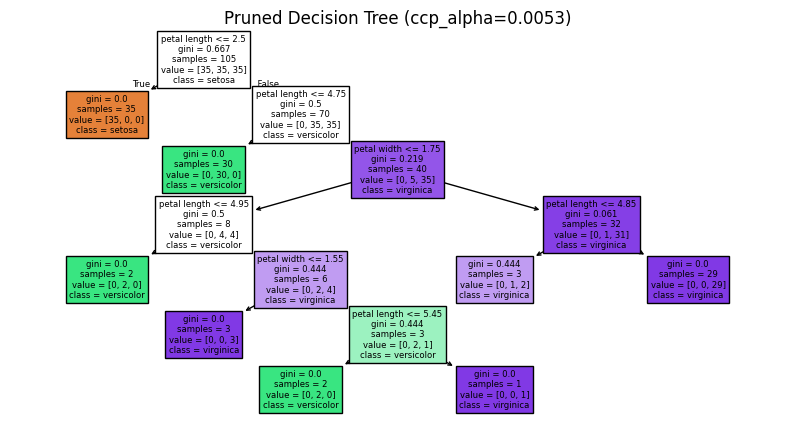

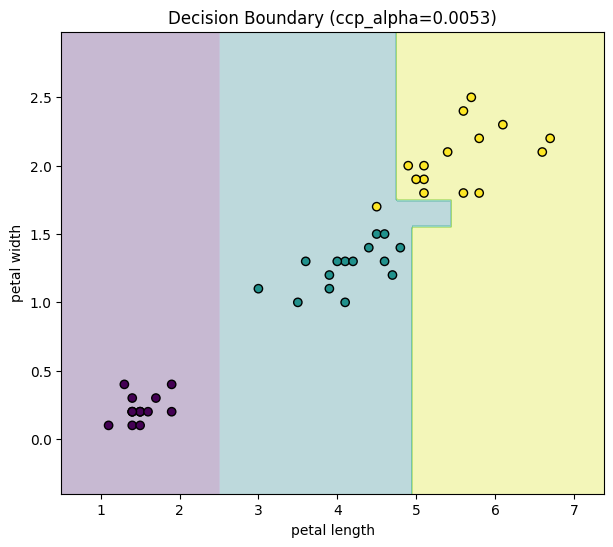

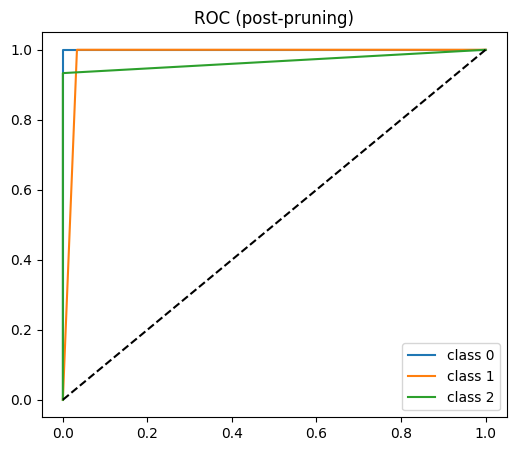

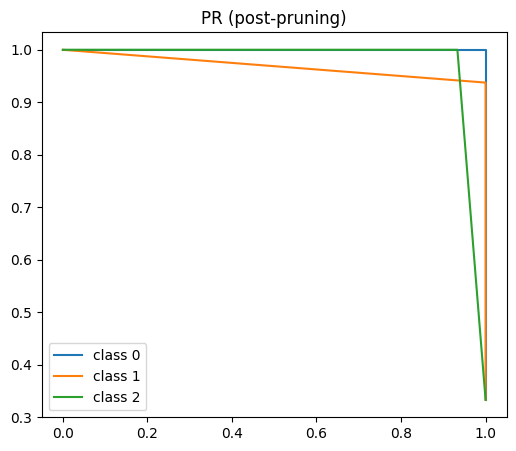

In [5]:
# 基于鸢尾花数据集，使用决策树的后剪枝技巧

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.preprocessing import label_binarize

# 加载数据
iris = load_iris()
X = iris.data[:, 2:4]  # 花瓣长/宽
y = iris.target

# 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=11, stratify=y
)

# 标签二值化
y_test_bin = label_binarize(y_test, classes=[0,1,2])

# 使用 GridSearchCV 寻找最佳 ccp_alpha
# ccp_alpha是成本复杂度剪枝参数，值越大剪枝力度越大
params = {
    "ccp_alpha": np.linspace(0, 0.05, 20)  # 测试一系列 alpha
}

clf = DecisionTreeClassifier(random_state=35)
# 使用5折交叉验证寻找最佳参数
grid = GridSearchCV(clf, params, cv=5)
grid.fit(X_train, y_train)

best_alpha = grid.best_params_['ccp_alpha']
print("最佳 ccp_alpha =", best_alpha)

# 用最佳 alpha 重新训练
best_tree = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=35)
best_tree.fit(X_train, y_train)

# 评估性能
y_pred = best_tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"测试集 Accuracy：{acc:.4f}")
print(f"F1-score：{f1_score(y_test, y_pred, average='macro'):.4f}")

# 决策树可视化
plt.figure(figsize=(10,5))
plot_tree(best_tree, filled=True,
          feature_names=["petal length","petal width"],
          class_names=iris.target_names)
plt.title(f"Pruned Decision Tree (ccp_alpha={best_alpha:.4f})")
plt.show()

# 决策边界
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = best_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, alpha=0.3)  # 决策边界区域
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k')  # 测试样本
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title(f"Decision Boundary (ccp_alpha={best_alpha:.4f})")
plt.show()

# ROC 曲线
y_score = best_tree.predict_proba(X_test)
plt.figure(figsize=(6,5))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f"class {i}")

plt.plot([0,1], [0,1], "k--")  # 对角线
plt.title("ROC (post-pruning)")
plt.legend()
plt.show()

# PR 曲线
plt.figure(figsize=(6,5))
for i in range(3):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f"class {i}")

plt.title("PR (post-pruning)")
plt.legend()
plt.show()